# Shuffle and hyperparameters Tuning for hearing data set [Cross-validation](http://scikit-learn.org/stable/modules/cross_validation.html)

In [1]:
import numpy as np
import pandas as pd
from sklearn import svm, metrics
#from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV,LeaveOneOut
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve, auc
from matplotlib import pyplot as plt
from collections import Counter
from scipy.stats import norm
import seaborn as sns; sns.set(font_scale=1.2)
%matplotlib inline

# load the dataset

In [2]:
path='C:/Users/Sultan/OneDrive - The University of Memphis/RESEARCH2017S/Hearing_data/Graph_Braph/WUpclean13/indidivual/Nodalfeatures_Clean_LH_wup.csv'
dataset =pd.read_csv(path)

In [3]:
#sns.lmplot('dia','eccen',data=dataset,hue='class',palette='Set1',fit_reg=False,scatter_kws={"s":70})

# split the data set

In [4]:
X=dataset.iloc[:,2:6].values
y=dataset.iloc[:,6].values

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.20, random_state=40)     

# see the shape of the traing and test data set

In [32]:
#X_train.shape, y_train.shape
X_test.shape, y_test.shape   

((7L, 4L), (7L,))

In [33]:
X_test,y_test

(array([[ 6.7691,  7.3124,  6.5431,  6.8448],
        [ 6.5009,  6.2453,  6.3744,  6.4167],
        [ 6.7502,  7.0546,  6.9224,  6.9974],
        [ 5.7528,  5.9171,  6.0588,  5.7579],
        [ 7.6655,  7.0895,  6.3905,  6.5908],
        [ 5.9904,  6.3201,  5.9709,  6.1841],
        [ 5.9385,  6.1982,  5.8915,  6.1209]]),
 array([1, 1, 1, 0, 1, 0, 0], dtype=int64))

# Find the Class labels

In [34]:
np.unique(y_test)

array([0, 1], dtype=int64)

# Find the repeated class number 

In [35]:
np.unique(y_test,return_counts=True)

(array([0, 1], dtype=int64), array([3, 4], dtype=int64))

# Gridserach CV

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import LeaveOneOut

In [27]:
leaveout = LeaveOneOut()
leaveout.get_n_splits(X_train)

16L

In [28]:
parameters = {'kernel':('linear', 'rbf','poly','sigmoid'), 'C':[1, 10,100,1000],'gamma':[0.01,.002,0.003]}
svc = svm.SVC()


In [29]:
#X[train_index]

In [30]:
count = 1
totalacc = 0
for train_index, test_index in leaveout.split(X):
    #print train_index,test_index
    X_trn, X_tst = X[train_index], X[test_index]
    y_trn, y_tst = y[train_index], y[test_index]
    clf = GridSearchCV(svc, parameters)
    clf.fit(X_trn, y_trn)
    #print clf.best_estimator_
    acc = accuracy_score(clf.best_estimator_.predict(X_tst),y_tst)
    totalacc = totalacc + acc
    count = count + 1
print totalacc/count

0.636363636364


In [36]:
# count = 1
# totalacc = 0
# for train_index, test_index in leaveout.split(X_train):
#     #print train_index,test_index
#     X_trn, X_tst = X_train[train_index], X_train[test_index]
#     y_trn, y_tst = y_train[train_index], y_train[test_index]
#     clf = GridSearchCV(svc, parameters)
#     clf.fit(X_trn, y_trn)
#     print clf.best_estimator_
#     acc = accuracy_score(clf.best_estimator_.predict(X_tst),y_tst)
#     totalacc = totalacc + acc
#     count = count + 1
# print totalacc/count

In [12]:
#print clf.cv_results_
#clf.best_estimator_

# Find the best parameters  

In [15]:
clf.best_estimator_

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.01, kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [16]:
pred=clf.best_estimator_.predict(X_test)
clf.score(X_test, y_test)  
print pred
print y_test

[1 0 1 0 1 0 0]
[1 1 1 0 1 0 0]


In [17]:
acc=accuracy_score(clf.best_estimator_.predict(X_test),y_test)
print acc

0.857142857143


In [18]:
conf_mat=confusion_matrix(y_test,pred)
conf_mat

array([[3, 0],
       [1, 3]])

In [19]:
from sklearn.metrics import classification_report
#target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_test, pred))

             precision    recall  f1-score   support

          0       0.75      1.00      0.86         3
          1       1.00      0.75      0.86         4

avg / total       0.89      0.86      0.86         7



 # [ROC Curve](https://datamize.wordpress.com/2015/01/24/how-to-plot-a-roc-curve-in-scikit-learn/)

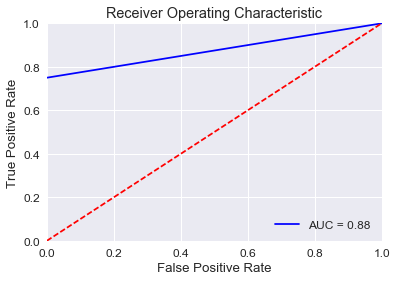

In [20]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pred)
#false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(pred, y_test)
#print false_positive_rate
roc_auc = auc(false_positive_rate, true_positive_rate)
#print 'FPR=',false_positive_rate,'\n','TPR=',true_positive_rate
fig,ax1=plt.subplots(ncols=1)
ax1.plot(false_positive_rate, true_positive_rate, 'b-', label = 'AUC = %0.2f' % roc_auc)
ax1.legend(loc = 'lower right')
ax1.plot([0, 1], [0, 1],'r--')
ax1.set_xlim([0, 1])
ax1.set_ylim([0, 1])
ax1.set_ylabel('True Positive Rate')
ax1.set_xlabel('False Positive Rate')
ax1.set_title('Receiver Operating Characteristic')